In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

df = pd.read_csv("dataset/yield_curve_2006.csv",index_col = 0)

df

,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,
2021-12-31,0.06,0.06,0.19,0.39,0.73,0.97,1.26,1.44,1.52,1.94,1.90
2021-12-30,0.06,0.05,0.19,0.38,0.73,0.98,1.27,1.44,1.52,1.97,1.93
2021-12-29,0.01,0.05,0.19,0.38,0.75,0.99,1.29,1.47,1.55,2.00,1.96
2021-12-28,0.03,0.06,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.94,1.90
2021-12-27,0.04,0.06,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.92,1.88
...,...,...,...,...,...,...,...,...,...,...,...
2006-02-15,4.39,4.55,4.70,4.70,4.71,4.68,4.60,4.60,4.61,4.78,4.58
2006-02-14,4.42,4.55,4.72,4.71,4.69,4.68,4.61,4.61,4.62,4.80,4.60
2006-02-13,4.38,4.55,4.71,4.70,4.68,4.66,4.58,4.58,4.58,4.76,4.56


In [10]:
len(df)

3976

In [11]:
def plot_curve(date):

    plot_data = df.loc[date].values

    row_index = ["1 Mo", "3 Mo", "6 Mo", "1 Yr", "2 Yr", "3 Yr", "5 Yr", "7 Yr", "10 Yr", "20 Yr", "30 Yr"]

    # Plotting the line chart
    plt.figure(figsize=(10,6))
    plt.plot(row_index, plot_data, marker='o', color='b', linestyle='-')
    plt.title("Yield Curve on "+date)
    plt.xlabel("Maturity")
    plt.ylabel("Yield")
    plt.ylim(0, 6)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    

# List of dates
freq_values = df.index.values

# Create an interactive slider with discrete values
widgets.interact(plot_curve, date=widgets.SelectionSlider(options=freq_values, description='Date'));


interactive(children=(SelectionSlider(description='Date', options=('2021-12-31', '2021-12-30', '2021-12-29', '…

## PCA analysis

In [12]:
from sklearn.decomposition import PCA

mat = df.values

curve_shifting = mat[:-1]-mat[1:]

shifting_df = pd.DataFrame(curve_shifting)
shifting_df.index = df.index[:-1]



pca = PCA(n_components = 3)

factors = pca.fit_transform(curve_shifting)

explained_variance = pca.explained_variance_

explained_variance

array([0.01801443, 0.00608817, 0.00197101])

In [13]:
ratio = pca.explained_variance_ratio_
ratio

array([0.63595476, 0.21492763, 0.06958164])

In [14]:
factors

array([[ 0.0233348 , -0.01926842, -0.02080089],
       [ 0.05337978, -0.05544021,  0.01166301],
       [-0.09789909,  0.05986192,  0.04242284],
       ...,
       [-0.08874301, -0.01178991,  0.03276838],
       [ 0.00573308, -0.02928283,  0.01714424],
       [-0.12495633, -0.02796372, -0.00042248]])

In [15]:
pca.components_

array([[-1.29337254e-01, -1.19871547e-01, -1.28780307e-01,
        -1.63337856e-01, -2.78467263e-01, -3.31977734e-01,
        -3.96006372e-01, -4.12627307e-01, -3.92383975e-01,
        -3.66440301e-01, -3.50085435e-01],
       [-7.23515587e-01, -4.87262376e-01, -2.98540165e-01,
        -2.15932665e-01, -7.10518777e-02, -2.20588583e-02,
         6.21099712e-02,  1.14620161e-01,  1.46309666e-01,
         1.73450576e-01,  1.71246645e-01],
       [ 4.74010438e-01, -6.54078449e-02, -2.40568855e-01,
        -2.85961648e-01, -4.15802422e-01, -3.55861338e-01,
        -1.76518105e-01,  2.52155350e-04,  1.60799445e-01,
         3.49129780e-01,  3.91091760e-01]])

## The shape of each factor

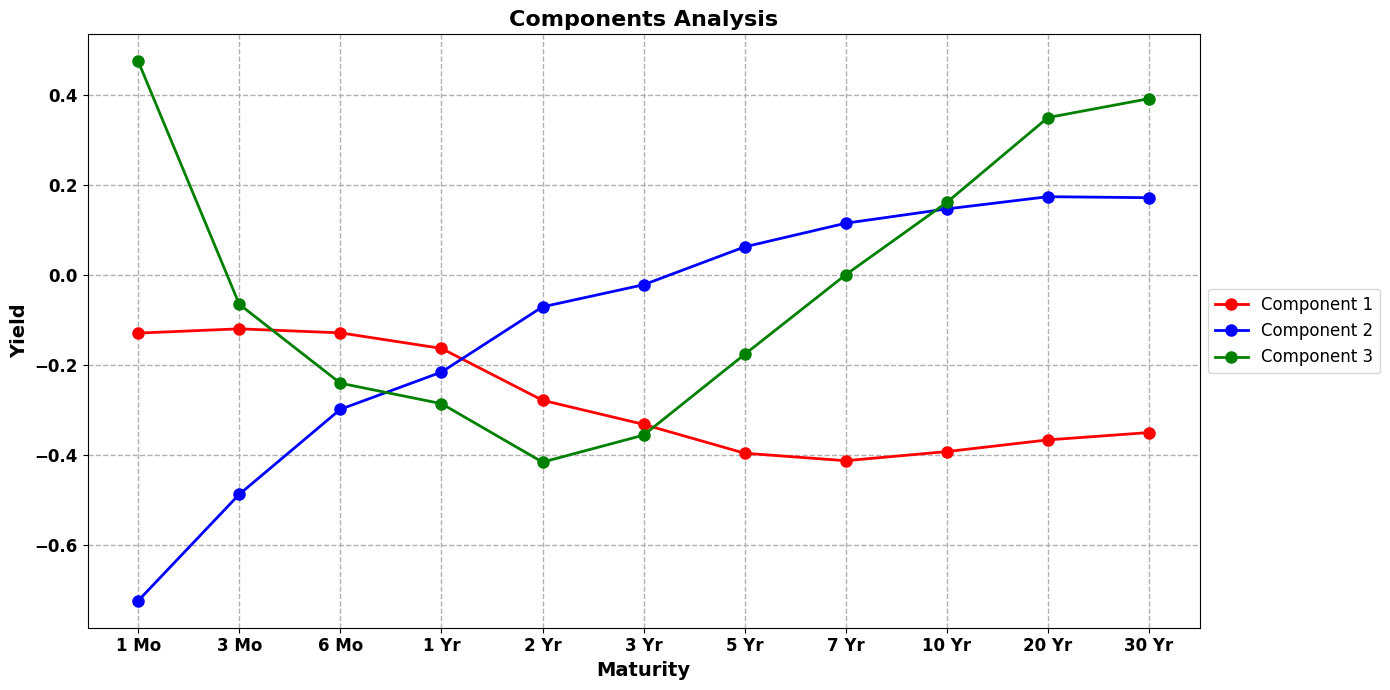

In [16]:
# Given data
row_index = ["1 Mo", "3 Mo", "6 Mo", "1 Yr", "2 Yr", "3 Yr", "5 Yr", "7 Yr", "10 Yr", "20 Yr", "30 Yr"]
component_1, component_2, component_3 = pca.components_
plt.figure(figsize=(14,7))
plt.plot(row_index, component_1, color='red', label='Component 1', marker='o', linewidth=2, markersize=8)
plt.plot(row_index, component_2, color='blue', label='Component 2', marker='o', linewidth=2, markersize=8)
plt.plot(row_index, component_3, color='green', label='Component 3', marker='o', linewidth=2, markersize=8)
plt.title("Components Analysis", fontsize=16, fontweight='bold')
plt.xlabel("Maturity", fontsize=14, fontweight='bold')
plt.ylabel("Yield", fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


## Evaluete the information loss using PCA for dimension reduction

In [17]:
shifting_recovery = pd.DataFrame(np.matmul(factors, pca.components_))

shifting_recovery.index = shifting_df.index


def plot_dual_curve(date):

    plot_data1 = shifting_df.loc[date].values
    plot_data2 = shifting_recovery.loc[date].values

    row_index = ["1 Mo", "3 Mo", "6 Mo", "1 Yr", "2 Yr", "3 Yr", "5 Yr", "7 Yr", "10 Yr", "20 Yr", "30 Yr"]

    # Plotting the line chart
    plt.figure(figsize=(10,6)) 
    
    plt.plot(row_index, plot_data1, color='b', label='Real Curve', marker='o', linestyle = '-', linewidth=2, markersize=8)
    plt.plot(row_index, plot_data2, color='r', label='Recovered Curve', marker='o', linestyle = '-', linewidth=2, markersize=8)
    
    
    
    plt.title("Yield Curve on "+date)
    plt.xlabel("Maturity")
    plt.ylabel("Yield Shifting")
    plt.ylim(-0.1, 0.1)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()
    

# List of dates
freq_values = shifting_df.index.values

# Create an interactive slider with discrete values
widgets.interact(plot_dual_curve, date=widgets.SelectionSlider(options=freq_values, description='Date'));


interactive(children=(SelectionSlider(description='Date', options=('2021-12-31', '2021-12-30', '2021-12-29', '…

## We store the Gamma matrix, which is `pca.components_.T`, for synthetic data generation. In addition, we use an autoregressive process to model the dynamic of factors. We consider the 3 factors as independent processes.

In [18]:
factors_df = pd.DataFrame(factors)
factors_df.index = shifting_df.index

factors_df.to_csv("dataset/real_factors.csv")

## For demonstration purpose, follow the time series analysis paradigm.

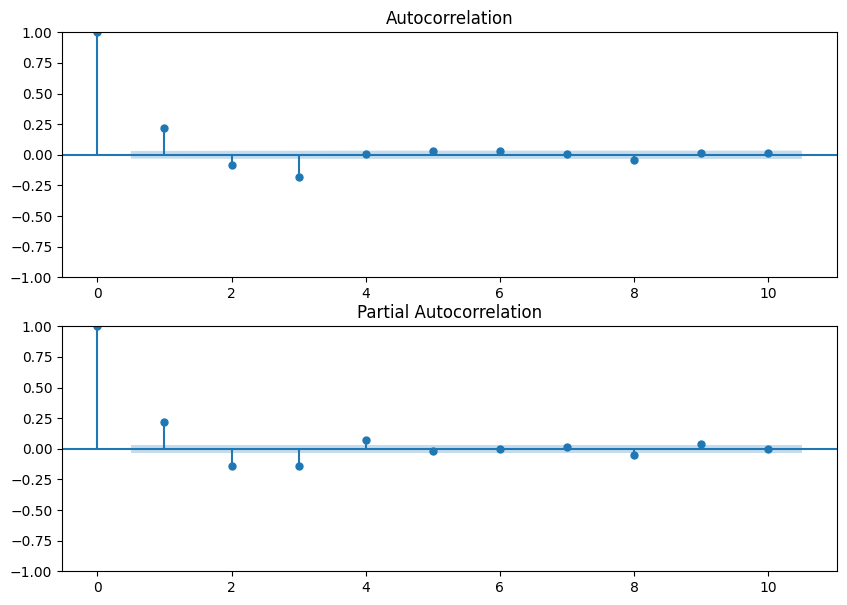

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,7))
plot_acf(factors[:, 1],lags=10, ax=ax[0]);
plot_pacf(factors[:, 1],lags=10, ax=ax[1], method='ols');


## Factor 1 and 3 show barely any autocorrelation, but due to Factor 4, we still consider an AR(4) model. 

In [20]:
from statsmodels.tsa.ar_model import AutoReg

ar_model_1 = AutoReg(factors[:, 0], lags=4, trend = "n").fit()
ar_model_2 = AutoReg(factors[:, 1], lags=4, trend = "n").fit()
ar_model_3 = AutoReg(factors[:, 2], lags=4, trend = "n").fit()

print(ar_model_2.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3975
Model:                     AutoReg(4)   Log Likelihood                4685.051
Method:               Conditional MLE   S.D. of innovations              0.074
Date:                Mon, 18 Sep 2023   AIC                          -9360.103
Time:                        10:44:04   BIC                          -9328.669
Sample:                             4   HQIC                         -9348.956
                                 3975                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y.L1           0.2448      0.016     15.471      0.000       0.214       0.276
y.L2          -0.0988      0.016     -6.137      0.000      -0.130      -0.067
y.L3          -0.1571      0.016     -9.759      0.0

In [21]:
cov1, cov2, cov3 = np.cov(ar_model_1.resid), np.cov(ar_model_2.resid), np.cov(ar_model_3.resid)
print(cov1)
print(cov2)
print(cov3)

0.017963013055336898
0.005531710499669175
0.0019633313646103107


## Check that $\epsilon$ is indeed negligible compared to $\xi$ 

In [22]:
from numpy.linalg import eigh

eps_mat = np.cov((shifting_df.values - shifting_recovery.values).T)

xi_mat = (pca.components_.T @ np.diag([cov1, cov2, cov3])) @ pca.components_

eps_eigenvalues, _ = eigh(eps_mat)
xi_eigenvalues, _ = eigh(xi_mat)

print("eps cov eigenvalues: ",np.sort(eps_eigenvalues)[::-1][:3])
print("xi cov eigenvalues: ",np.sort(xi_eigenvalues)[::-1][:3])

eps cov eigenvalues:  [0.00114392 0.00044728 0.00026074]
xi cov eigenvalues:  [0.01796301 0.00553171 0.00196333]


## The model takes the form $F_t = A_1 F_{t-1} + A_2 F_{t-2} + A_3 F_{t-3} + A_4 F_{t-4}+\xi$, where $A_i$ are all diagonal matrices. But now we are deliberately multiplying an orthogonal matrix U to the factors, only to mix up factors so that they don't act independently. Now $F' = U F$, thus $A' = U A U^T$, and $\xi' \sim N(0, U \Sigma U^T)$. Also, $F$ will need to be recovered when calculating the portfolio returns, and this recovery is achieved by $F = U^T F'$.

In [23]:
from scipy.stats import ortho_group


# U = ortho_group.rvs(3)
U = np.identity(3)
A1 = np.diag([ar_model_1.params[0], ar_model_2.params[0], ar_model_3.params[0]])
A2 = np.diag([ar_model_1.params[1], ar_model_2.params[1], ar_model_3.params[1]])
A3 = np.diag([ar_model_1.params[2], ar_model_2.params[2], ar_model_3.params[2]])
A4 = np.diag([ar_model_1.params[3], ar_model_2.params[3], ar_model_3.params[3]])
Sigma = np.diag([cov1, cov2, cov3])


A1_ = U @ A1
A2_ = U @ A2
A3_ = U @ A3
A4_ = U @ A4
Sigma_ = U @ Sigma @ U.T

## Wrap up all the results and save

In [24]:
dic = {
    "A1_": A1_,
    "A2_": A2_,
    "A3_": A3_,
    "A4_": A4_,
    "Sigma_xi": Sigma_,
    "Sigma_eps": eps_mat,
    "U": U,
    "Gamma": pca.components_.T,
    "eigenVals": explained_variance
}

np.save('dataset/synthetic_parameters.npy',dic)